In [2]:
import pyodbc as odbc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

    
# Connect to SQL Server
DRIVER_NAME='SQL SERVER'
SERVER_NAME='<your_server_name>'
DATABASE_NAME='<your_database_name>'

#uid=<user_name>
#pwd=<passaword>

connection_string= f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection=yes;
"""
conn= odbc.connect(connection_string)
print(conn)
print("connect successfull\n")

connect successfull



In [5]:
cursor = conn.cursor()
cursor.execute("SELECT Date , Magnitude, Location FROM eq_data where Magnitude > 40;")
data1 = cursor.fetchall()
print("          LIST OF EARTHQUAKE BIGGER THAN 4.0 \n")
print("             DATE                MAGNITUDE  LOCATION")
for i in data1:
    print("**",i)
print("\n")

          LIST OF EARTHQUAKE BIGGER THAN 4.0 

             DATE                MAGNITUDE  LOCATION
** ('2023-03-14 06:47:34.0000000', 47.0, 'Kahramanmaraş')
** ('2023-03-13 02:23:14.0000000', 44.0, 'Hatay')
** ('2023-03-13 02:13:51.0000000', 45.0, 'Malatya')
** ('2023-03-13 01:34:29.0000000', 47.0, 'Malatya')
** ('2023-03-12 12:31:21.0000000', 44.0, 'Adana')
** ('2023-03-10 02:28:13.0000000', 48.0, 'Kayseri')
** ('2023-03-09 23:34:16.0000000', 41.0, 'Adıyaman')
** ('2023-03-09 21:08:48.0000000', 41.0, 'Gaziantep')
** ('2023-03-09 18:55:27.0000000', 45.0, 'Adıyaman')




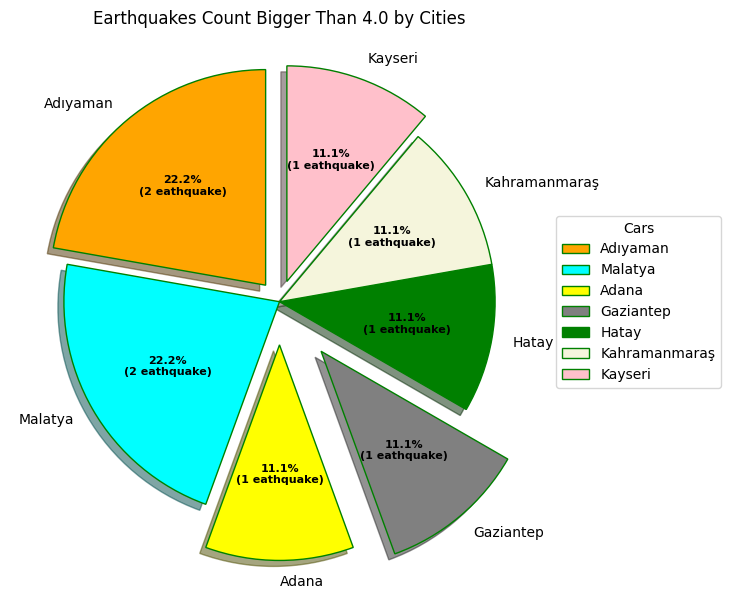

In [6]:
#FIRST VISULATION
cursor.execute("SELECT COUNT(Location) as Adet, Location FROM eq_data where Magnitude > 40 GROUP BY Location Order by Adet desc")
data2 = cursor.fetchall()
y_values = [row[0] for row in data2]
x_values = [row[1] for row in data2]

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1)

# Creating color parameters
colors = ( "orange", "cyan", "yellow",
          "grey", "green", "beige","pink")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} eathquake)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y_values,
                                  autopct = lambda pct: func(pct, y_values),
                                  explode = explode,
                                  labels = x_values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, x_values,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

ax.set_title("Earthquakes Count Bigger Than 4.0 by Cities")
 
# show plot
plt.show()

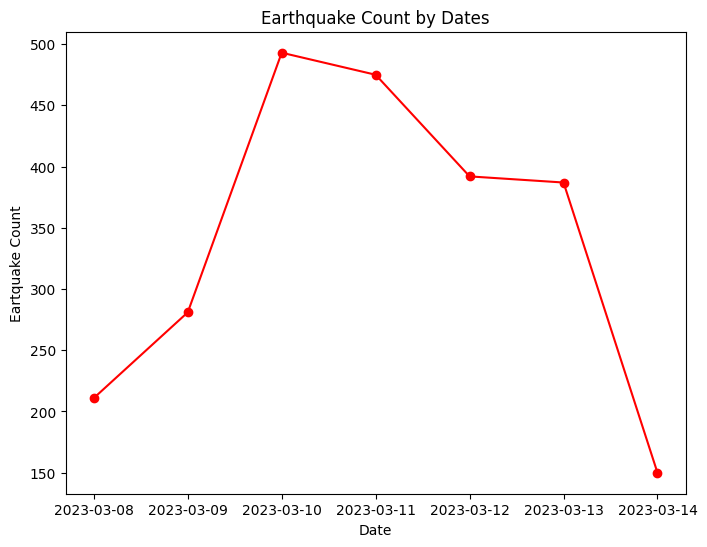

In [7]:
#SECOND VISULATION
# Extract X and Y values from data
cursor.execute("select Count(CONVERT(DATE, Date)) as Adet , CONVERT(DATE, Date) as Date from eq_data Group by CONVERT(DATE, Date) order by CONVERT(DATE, Date)")
data3 = cursor.fetchall()

y1_values = [row[0] for row in data3]
x1_values = [row[1] for row in data3]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Eartquake Count')
ax.set_title('Earthquake Count by Dates')
ax.plot(x1_values, y1_values, color = 'red', linestyle = '-', marker = 'o')

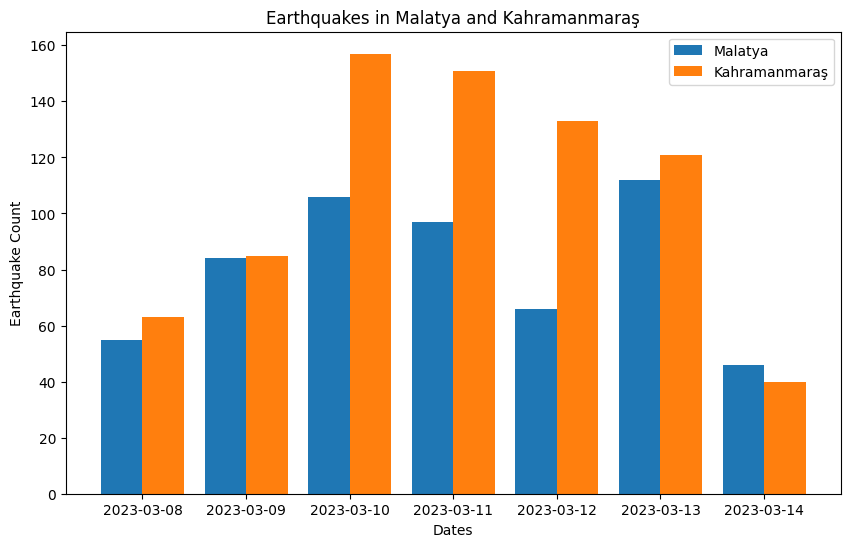

In [8]:
#THIRD VISULATION
cursor.execute("SELECT COUNT(Location) as Adet, CAST(Date AS DATE) as Date FROM eq_data where Location= 'Malatya' GROUP BY CAST(Date AS DATE) Order by CAST(Date AS DATE)")
data4 = cursor.fetchall()

y2_values = [row[0] for row in data4]
x2_values = [row[1] for row in data4]

cursor.execute("SELECT COUNT(Location) as Adet, CAST(Date AS DATE) as Date FROM eq_data where Location= 'Kahramanmaraş' GROUP BY CAST(Date AS DATE) Order by CAST(Date AS DATE)")
data5 = cursor.fetchall()
y3_values = [row[0] for row in data5]

X_axis = np.arange(len(x2_values))

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(X_axis - 0.2, y2_values, 0.4, label = 'Malatya')
plt.bar(X_axis + 0.2, y3_values, 0.4, label = 'Kahramanmaraş')
  
plt.xticks(X_axis, x2_values)
plt.xlabel("Dates")
plt.ylabel("Earthquake Count")
plt.title("Earthquakes in Malatya and Kahramanmaraş")
plt.legend()
plt.show()
